In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
%matplotlib inline

In [6]:
customers= pd.read_csv('Ecommerce Customers')

In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [8]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


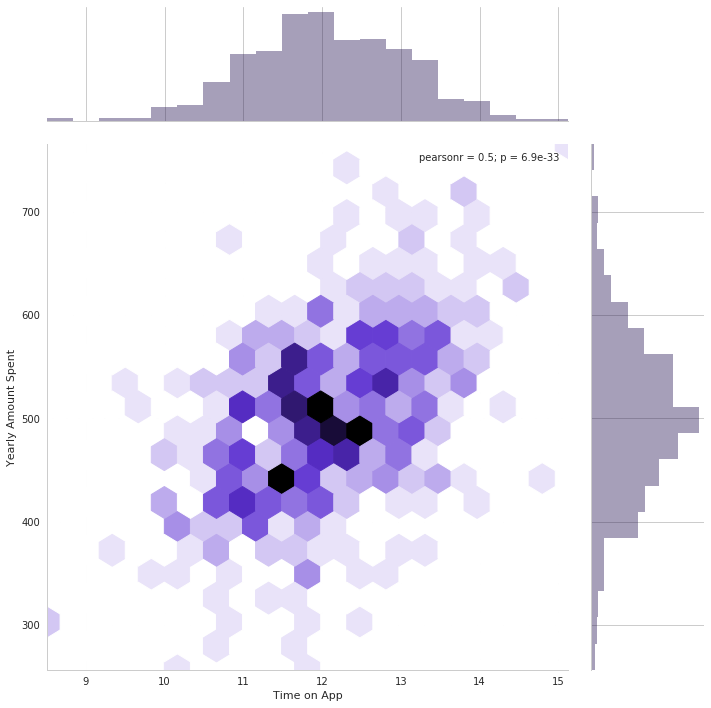

In [29]:

sns.set_palette('magma')
sns.set_style('whitegrid')
sns.set_context('notebook')

sns.jointplot(data=customers, x='Time on App', y='Yearly Amount Spent',size=10,ratio=4,kind='hex')



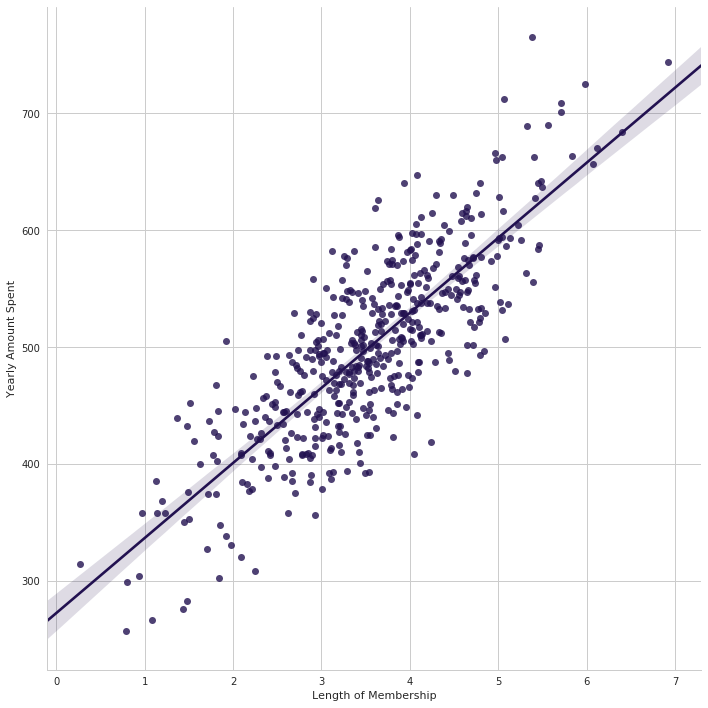

In [33]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent',data=customers,size=10)

In [34]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [36]:
x=customers[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

In [37]:
y=customers['Yearly Amount Spent']

In [38]:
from sklearn.cross_validation import train_test_split

In [41]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.4,random_state=101)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lm = LinearRegression()

In [47]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
lm.coef_

array([25.69154034, 37.89259966,  0.56058149, 61.64859402])

In [49]:
cdf = pd.DataFrame(lm.coef_,index=x_train.columns, columns=['coefficient'])

In [50]:
cdf

,coefficient
Avg. Session Length,25.691540
Time on App,37.892600
Time on Website,0.560581
Length of Membership,61.648594


In [52]:
p=lm.predict(x_test)

Text(0.5,0,'y_test')

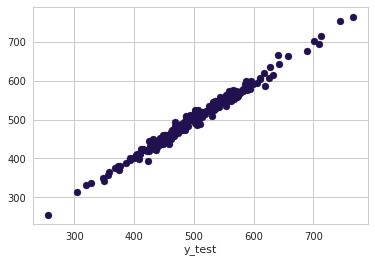

In [72]:
plt.scatter(y_test,p)

plt.xlabel('y_test')

In [75]:
from sklearn import metrics

In [76]:
def evaluation(x,y):
    print( 'MAE :', metrics.mean_absolute_error(y_test,p))
    return 'MSE :', metrics.mean_squared_error(y_test,p))
    return 'RMAE :', np.sqrt(metrics.mean_squared_error(y_test,p))


In [77]:
evaluation(y_test,p)

('MAE :', 7.742671285838744)

In [81]:
from scipy import stats

In [84]:
slope, intercept,r_value,p_value,std_err =stats.linregress(customers['Length of Membership'],customers['Yearly Amount Spent'])

In [85]:
slope

64.2186843155843

In [86]:
def predict(x):
    return (slope*x)+intercept

In [88]:
fitline= predict(customers['Length of Membership'])

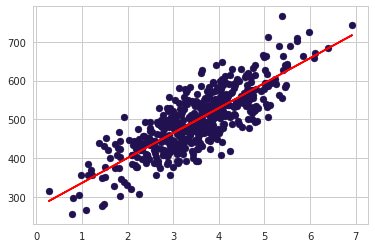

In [90]:
plt.scatter('Length of Membership','Yearly Amount Spent',data=customers)
plt.plot(customers['Length of Membership'],fitline,c='r')

In [91]:
r_value**2

0.6546162204082381